In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor


data = pd.read_excel('data_02a.xlsx')

# Feature and Target split  
X = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']

print(X.head())
print(y.head())

      AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64


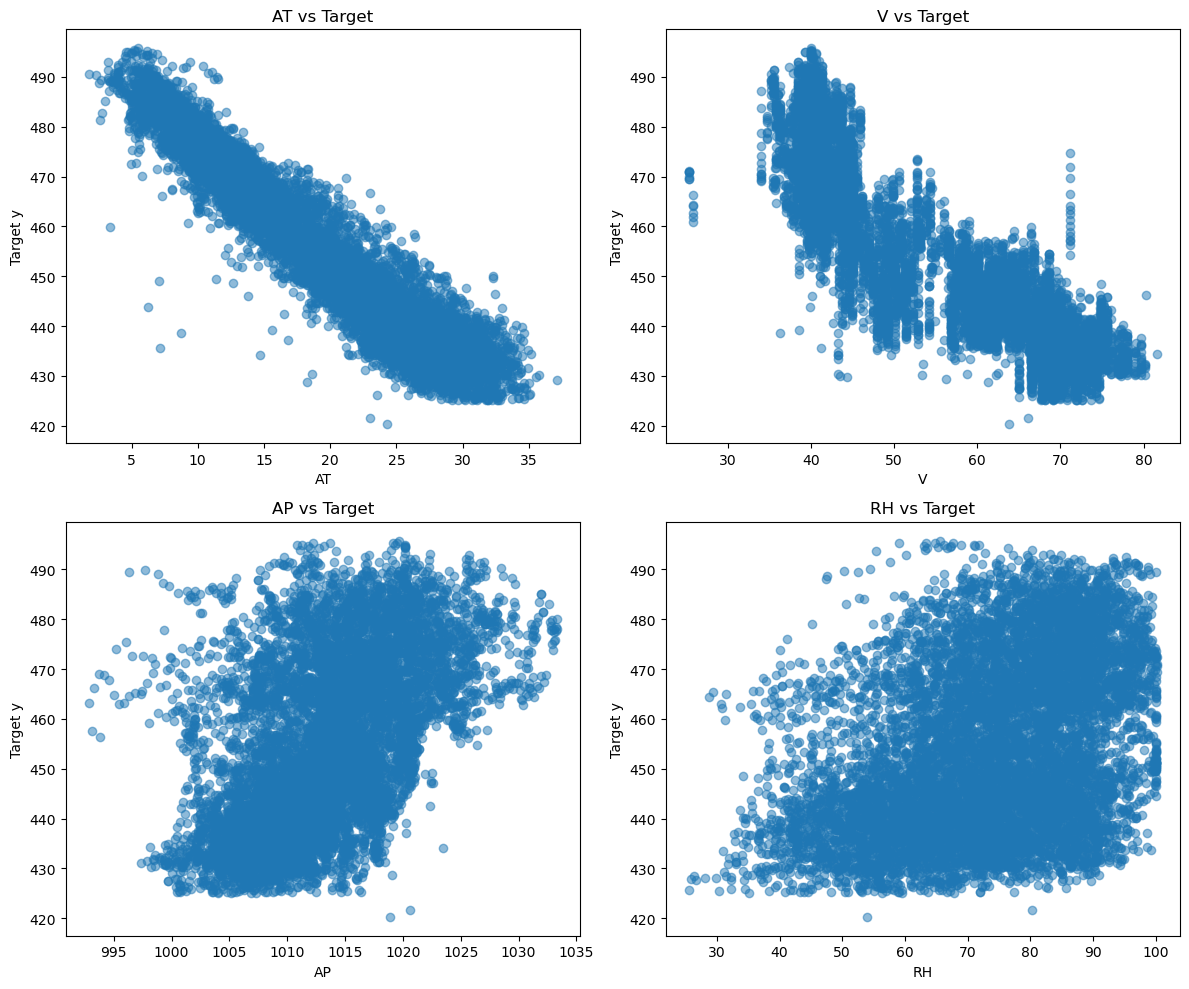

In [5]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i in range(4):
    axs[i].scatter(X.iloc[:, i], y, alpha=0.5)
    axs[i].set_xlabel(X.columns[i])
    axs[i].set_ylabel('Target y')
    axs[i].set_title(f'{X.columns[i]} vs Target')

plt.tight_layout()
plt.show()


In [8]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Errors
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)

print("Before Normalization:")
print(f"Training Error (MSE): {train_error:.4f}")
print(f"Validation Error (MSE): {val_error:.4f}")
print(f"Learned Parameters (coefficients): {model.coef_}")
print(f"Learned Bias (intercept): {model.intercept_}")


Before Normalization:
Training Error (MSE): 20.8934
Validation Error (MSE): 20.2737
Learned Parameters (coefficients): [-1.98589969 -0.23209358  0.06219991 -0.15811779]
Learned Bias (intercept): 454.5691145894144


In [10]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Retrain
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predict
y_train_pred_scaled = model_scaled.predict(X_train_scaled)
y_val_pred_scaled = model_scaled.predict(X_val_scaled)

# Errors
train_error_scaled = mean_squared_error(y_train, y_train_pred_scaled)
val_error_scaled = mean_squared_error(y_val, y_val_pred_scaled)

print("\nAfter Normalization:")
print(f"Training Error (MSE): {train_error_scaled:.4f}")
print(f"Validation Error (MSE): {val_error_scaled:.4f}")
print(f"Learned Parameters (coefficients): {model_scaled.coef_}")
print(f"Learned Bias (intercept): {model_scaled.intercept_}")



After Normalization:
Training Error (MSE): 20.8934
Validation Error (MSE): 20.2737
Learned Parameters (coefficients): [-14.76392739  -2.9496321    0.36978032  -2.31219566]
Learned Bias (intercept): 454.4310399790959


In [11]:
# KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_errors = []
val_errors = []
coefs = []
intercepts = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Normalize within fold
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)
    
    # Model
    model_fold = LinearRegression()
    model_fold.fit(X_train_fold_scaled, y_train_fold)
    
    # Predict
    y_train_fold_pred = model_fold.predict(X_train_fold_scaled)
    y_val_fold_pred = model_fold.predict(X_val_fold_scaled)
    
    # Errors
    train_errors.append(mean_squared_error(y_train_fold, y_train_fold_pred))
    val_errors.append(mean_squared_error(y_val_fold, y_val_fold_pred))
    coefs.append(model_fold.coef_)
    intercepts.append(model_fold.intercept_)

# Results
print("\n5-Fold Cross Validation Results:")
print(f"Average Training Error: {np.mean(train_errors):.4f}")
print(f"Average Validation Error: {np.mean(val_errors):.4f}")

print(f"Average Coefficients: {np.mean(coefs, axis=0)}")
print(f"Average Intercept: {np.mean(intercepts):.4f}")



5-Fold Cross Validation Results:
Average Training Error: 20.7638
Average Validation Error: 20.7994
Average Coefficients: [-14.73653157  -2.97213961   0.36889727  -2.30740827]
Average Intercept: 454.3650


/home/shawon/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/shawon/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/shawon/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/shawon/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/shawon/anacond

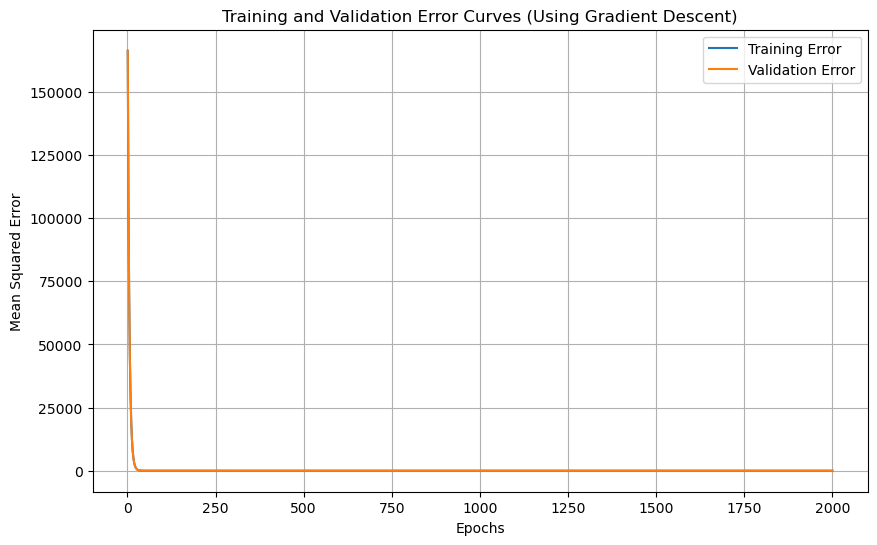

Final Training Error: 20.8936
Final Validation Error: 20.2758
Learned Parameters (Coefficients): [-14.76420635  -2.9605401    0.36406936  -2.31040769]
Learned Intercept (Bias): [454.4239177]


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize/Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Model: SGDRegressor (Stochastic Gradient Descent)
model = SGDRegressor(
    max_iter=1,           # Only 1 pass each time
    eta0=0.0001,            # Learning Rate
    penalty=None,         # No regularization
    warm_start=True,      # Continue training from previous epoch
    random_state=42
)

n_epochs = 2000  # Total number of training passes
train_errors = []
val_errors = []

# 5. Training Loop with manual epochs
for epoch in range(n_epochs):
    model.fit(X_train_scaled, y_train)  # Incremental fitting
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    
    # Mean Squared Errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    train_errors.append(train_mse)
    val_errors.append(val_mse)

# 6. Plot the Training and Validation Error Curves
plt.figure(figsize=(10,6))
plt.plot(range(1, n_epochs+1), train_errors, label='Training Error')
plt.plot(range(1, n_epochs+1), val_errors, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Error Curves (Using Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()

# 7. Final Outputs
print(f"Final Training Error: {train_errors[-1]:.4f}")
print(f"Final Validation Error: {val_errors[-1]:.4f}")
print(f"Learned Parameters (Coefficients): {model.coef_}")
print(f"Learned Intercept (Bias): {model.intercept_}")